# Set Up
The goal for this homework is to implement a basic localization and map building program - SLAM (simultaneous localization and mapping). For this assignment you implement SLAM with known correspondences. This means that the region will have known and recognizable landmarks. You will use a simple simulation program to simulate the motion of a differential drive robot. The robot has a lidar mounted on it. Your program will provide wheel commands to the simulator and you will receive lidar feedback.

Getting the robotics simulator running was fairly easy, I just made a couple adjustments in the visible_landmarks and producer functions. I also changed what the simulator published to be the model_state, actual_state, sensed_state, and collision detection.

# Mapping
After this, the mapping process was started first. To estimate landmark coordinates I did a simple weighted average which actually worked very well. Whenever a new landmark was found, it would be added to a found_landmarks array with its estimated x-y coordinates as well as a confidence factor. Each time a landmark was scanned by the lidar again the new coordinates would be averaged with the landmark's existing coordinates like so:

$$ \frac{confidence * x_{old} + x_{new}}{confidence + 1} $$

And then that landmark's confidence factor would just increase by one. This lead to very accurate landmark mapping even with wheel and lidar noise.
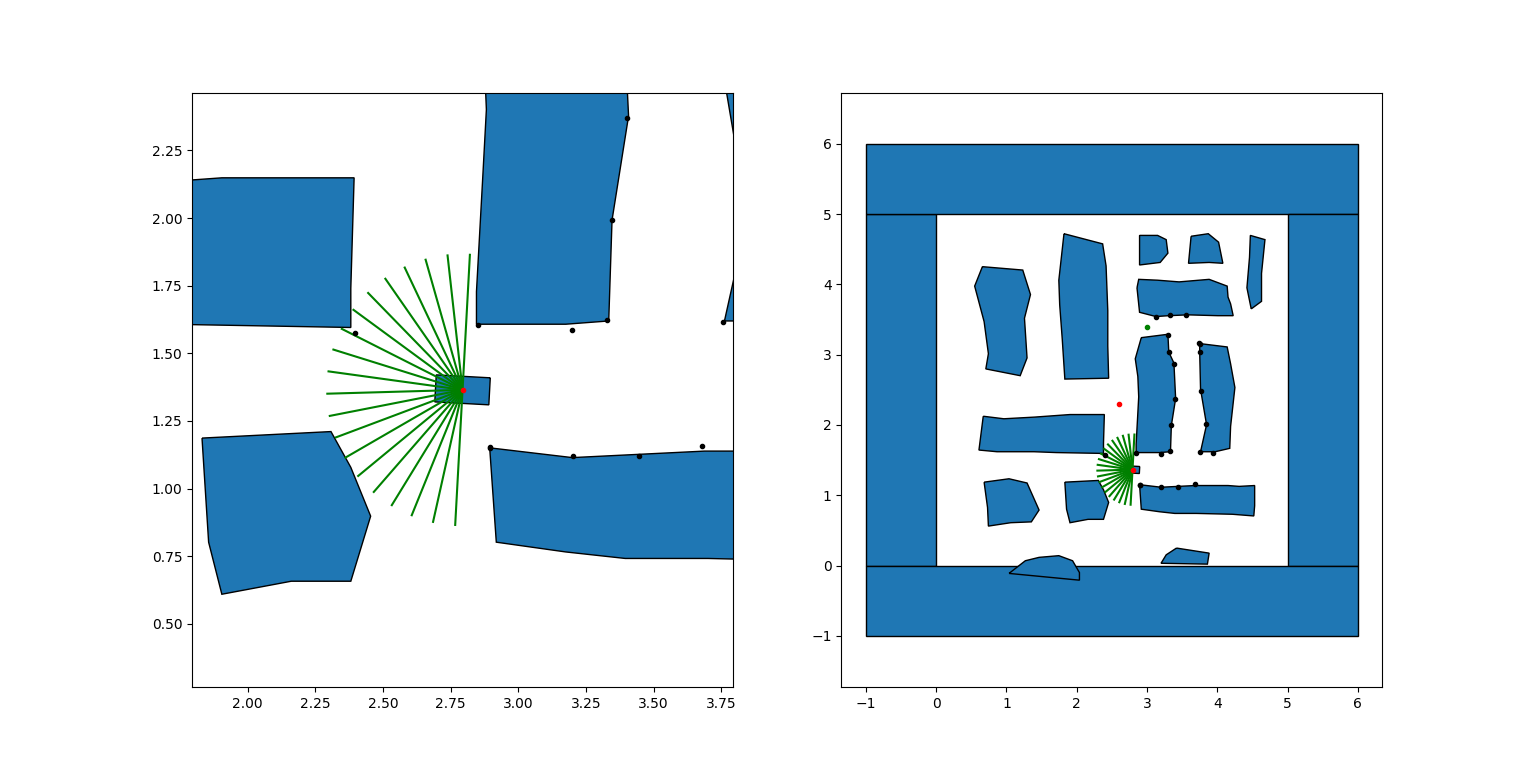

# Localization
After this the localization was started. This proved to be quite difficult however, and the final results are suboptimal at best. To begin, I used high confidence landmarks to esitmate the robot position based on the lidar readings. Turning off wheel noise and leaving lidar noise on, the localization did okay for a bit, but would then suddenly shift to bad positions (red).
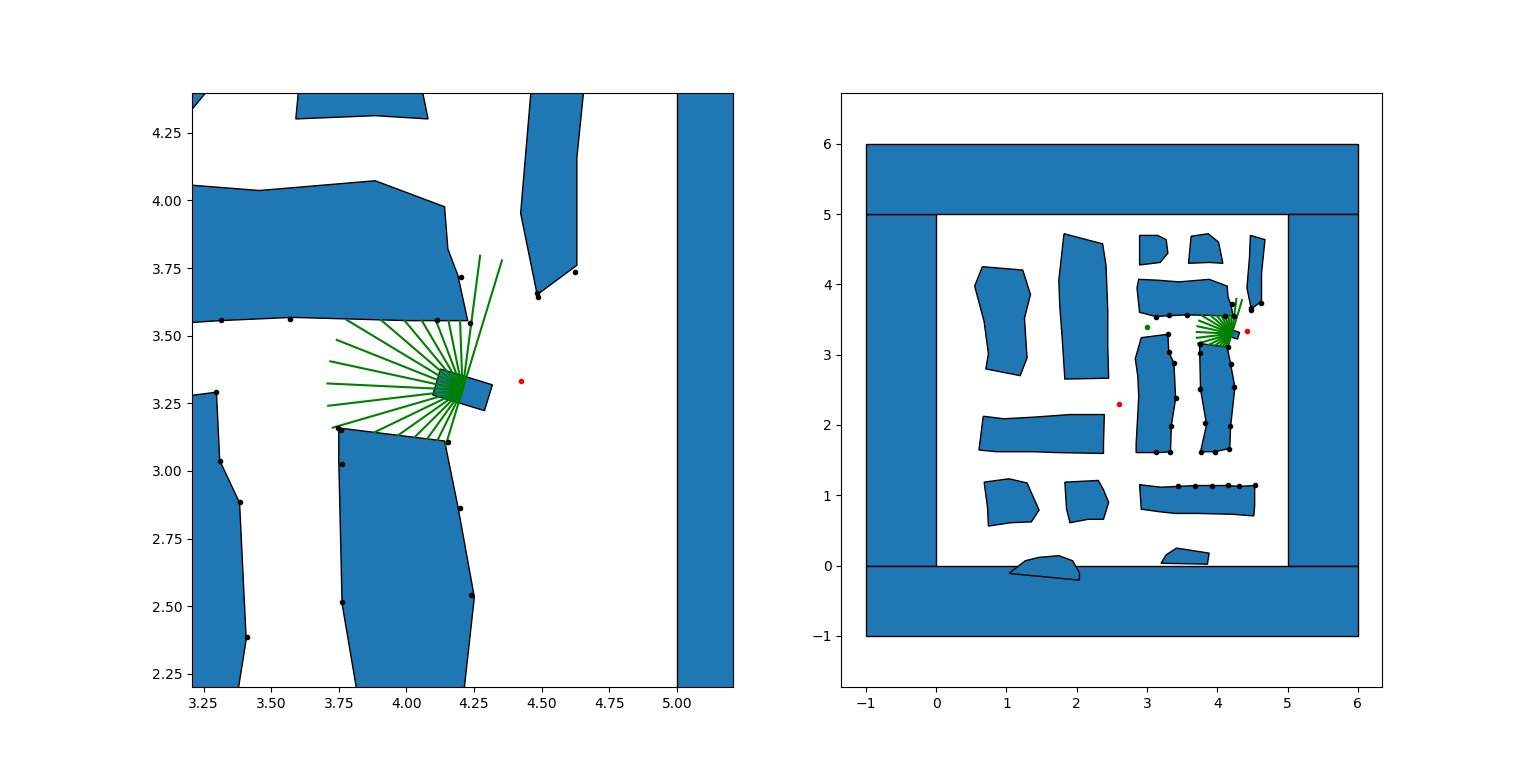

The method to find the robot location via the landmarks was just simple triangulation. So long as there were at least three landmarks visible it would be possible to estimate the robot's coordinates. In reality only two landmarks are needed actually, but I found it easy to implement using a minimum of three. The reason the sudden jumps may be occuring is because the noise from the lidar may move the triangulated coordinates in chaotic ways. Since this method depends on the intersection of circles and lines, a minute offset in the distance measurement could cause a large effect and move the intersection point quite far. Ao even with the weighted average included, it simply overpowered the results.

However, when wheel noise was turned back on the problem only became worse.
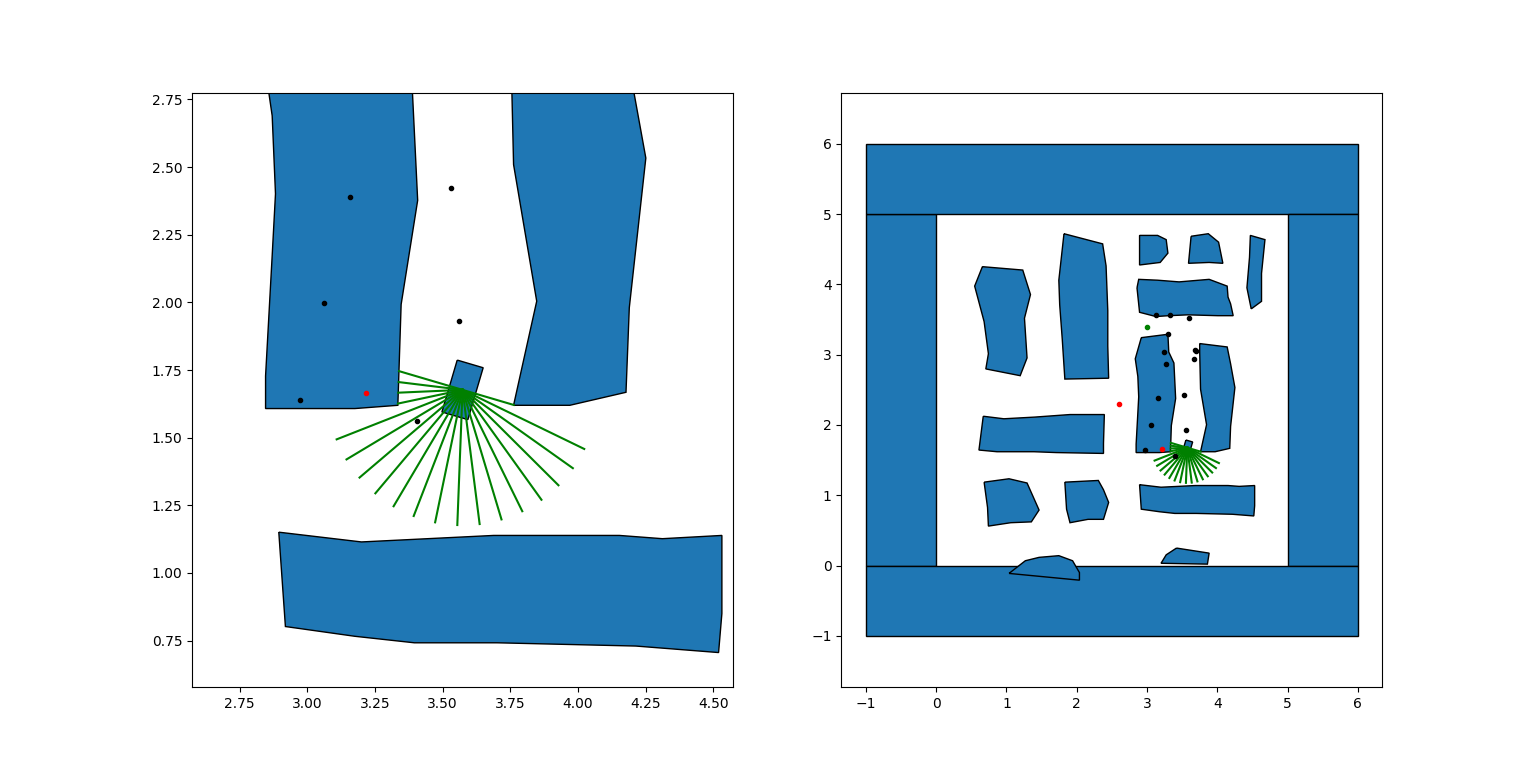

Before, lidar noise could be handled pretty reliably, but it seems the wheel noise was a much bigger factor. Unsurprisingly, it would seem a simple weighted average method would not be well suited for this type of problem. Since the lidar and wheel noise are but normal though, an EKF approach should work better. Unfortunetely I didn't have the time to try and implement an EKF algorithm.

I think the main problem is the "simultaneous" part of SLAM. My implementation calculates the model (prediction) and then uses that prediction alongside the measurments to nearby landmarks in the sensing phase to estimate the robot's position. Then it goes through the process again, using the previous iteration's sensing data for the model prediction step and so on. This makes it very easy for snowballing error to occur, as was seen in the last image.